Importing all required modules

In [52]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import layers
import pandas as pd
import datetime
import numpy as np
import matplotlib.pyplot as plt


In [53]:
df=pd.read_csv('C:/Users/AKASH RAJ R/Desktop/docs/core_projects/MSFT.csv')
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,1986-03-13,0.088542,0.101563,0.088542,0.097222,0.060396,1031788800
1,1986-03-14,0.097222,0.102431,0.097222,0.100694,0.062553,308160000
2,1986-03-17,0.100694,0.103299,0.100694,0.102431,0.063632,133171200
3,1986-03-18,0.102431,0.103299,0.098958,0.099826,0.062014,67766400
4,1986-03-19,0.099826,0.100694,0.097222,0.098090,0.060936,47894400
...,...,...,...,...,...,...,...
9459,2023-09-25,316.589996,317.670013,315.000000,317.540009,317.540009,17836000
9460,2023-09-26,315.130005,315.880005,310.019989,312.140015,312.140015,26297600
9461,2023-09-27,312.299988,314.299988,309.690002,312.790009,312.790009,19410100
9462,2023-09-28,310.989990,315.480011,309.450012,313.640015,313.640015,19683600


Taking only the dates and Close value into account 

In [54]:
df=df[['Date','Close']]
df

,Date,Close
0,1986-03-13,0.097222
1,1986-03-14,0.100694
2,1986-03-17,0.102431
3,1986-03-18,0.099826
4,1986-03-19,0.098090
...,...,...
9459,2023-09-25,317.540009
9460,2023-09-26,312.140015
9461,2023-09-27,312.790009
9462,2023-09-28,313.640015


Formatting Date as it is in raw string data type needs to be converted to date data type  

In [55]:
def dateConversion(sVal):
    fS=sVal.split('-')
    year,month,day=int(fS[0]),int(fS[1]),int(fS[2])
    return datetime.datetime(year=year,month=month,day=day)
# fC=dateConversion("2003-12-18")
# fC

In [56]:
df['Date']=df['Date'].apply(dateConversion)
df['Date']

C:\Users\AKASH RAJ R\AppData\Local\Temp\ipykernel_17936\2806457843.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Date']=df['Date'].apply(dateConversion)


0      1986-03-13
1      1986-03-14
2      1986-03-17
3      1986-03-18
4      1986-03-19
          ...    
9459   2023-09-25
9460   2023-09-26
9461   2023-09-27
9462   2023-09-28
9463   2023-09-29
Name: Date, Length: 9464, dtype: datetime64[ns]

Making Dates as index value

In [57]:
df.index=df.pop('Date')
df

,Close
Date,
1986-03-13,0.097222
1986-03-14,0.100694
1986-03-17,0.102431
1986-03-18,0.099826
1986-03-19,0.098090
...,...
2023-09-25,317.540009
2023-09-26,312.140015
2023-09-27,312.790009


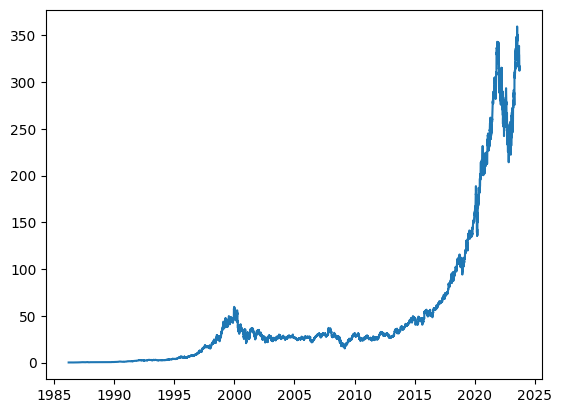

In [58]:
plt.plot(df.index,df['Close'])


In [59]:


def df_to_windowed_df(dataframe, first_date_str, last_date_str, n=3):
  first_date = dateConversion(first_date_str)
  last_date  = dateConversion(last_date_str)

  target_date = first_date
  
  dates = []
  X, Y = [], []

  last_time = False
  while True:
    df_subset = dataframe.loc[:target_date].tail(n+1)
    
    if len(df_subset) != n+1:
      print(f'Error: Window of size {n} is too large for date {target_date}')
      return

    values = df_subset['Close'].to_numpy()
    x, y = values[:-1], values[-1]

    dates.append(target_date)
    X.append(x)
    Y.append(y)

    next_week = dataframe.loc[target_date:target_date+datetime.timedelta(days=7)]
    next_datetime_str = str(next_week.head(2).tail(1).index.values[0])
    next_date_str = next_datetime_str.split('T')[0]
    year_month_day = next_date_str.split('-')
    year, month, day = year_month_day
    next_date = datetime.datetime(day=int(day), month=int(month), year=int(year))
    
    if last_time:
      break
    
    target_date = next_date

    if target_date == last_date:
      last_time = True
    
  ret_df = pd.DataFrame({})
  ret_df['Target Date'] = dates
  
  X = np.array(X)
  for i in range(0, n):
    X[:, i]
    ret_df[f'Target-{n-i}'] = X[:, i]
  
  ret_df['Target'] = Y

  return ret_df

# Start day second time around: '2021-03-25'
windowed_df = df_to_windowed_df(df, 
                                '2022-10-03', 
                                '2023-09-29', 
                                n=3)
windowed_df

,Target Date,Target-3,Target-2,Target-1,Target
0,2022-10-03,241.070007,237.500000,232.899994,240.740005
1,2022-10-04,237.500000,232.899994,240.740005,248.880005
2,2022-10-05,232.899994,240.740005,248.880005,249.199997
3,2022-10-06,240.740005,248.880005,249.199997,246.789993
4,2022-10-07,248.880005,249.199997,246.789993,234.240005
...,...,...,...,...,...
245,2023-09-25,320.769989,319.529999,317.010010,317.540009
246,2023-09-26,319.529999,317.010010,317.540009,312.140015
247,2023-09-27,317.010010,317.540009,312.140015,312.790009
248,2023-09-28,317.540009,312.140015,312.790009,313.640015


In [61]:
def windowed_df_to_date_X_y(windowed_dataframe):
  df_as_np = windowed_dataframe.to_numpy()
  dates = df_as_np[:, 0]
  middle= df_as_np[:, 1:-1]
  X = middle.reshape((len(dates), middle.shape[1], 1))
  Y = df_as_np[:, -1]

  return dates, X.astype(np.float32), Y.astype(np.float32)

dates, X, y = windowed_df_to_date_X_y(windowed_df)
dates.shape,X.shape,y.shape

((250,), (250, 3, 1), (250,))

Splitting training datas ,validation datas,testing datas
80%- training 
10%- validation
10%- test

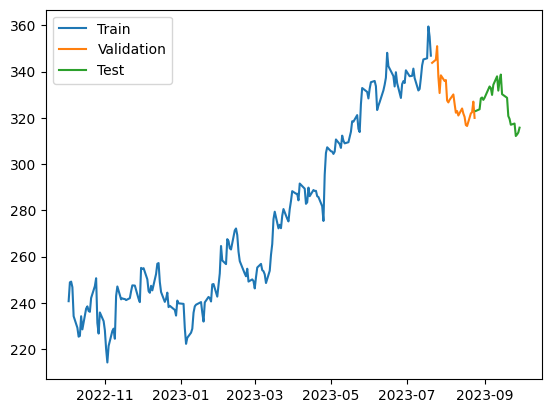

In [62]:
d1 = int(len(dates) * .8)
d2 = int(len(dates) * .9)

dates_train, X_train, y_train = dates[:d1], X[:d1], y[:d1]

dates_val, X_val, y_val = dates[d1:d2], X[d1:d2], y[d1:d2]
dates_test, X_test, y_test = dates[d2:], X[d2:], y[d2:]

plt.plot(dates_train, y_train)
plt.plot(dates_val, y_val)
plt.plot(dates_test, y_test)

plt.legend(['Train', 'Validation', 'Test'])

In [63]:
model = Sequential([layers.Input((3, 1)),
                    layers.LSTM(64),
                    layers.Dense(32, activation='relu'),
                    layers.Dense(32, activation='relu'),
                    layers.Dense(1)])

model.compile(loss='mse', 
              optimizer=Adam(learning_rate=0.001),
              metrics=['mean_absolute_error'])

model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=100)

Epoch 1/100
7/7 [==============================] - 3s 94ms/step - loss: 76879.4531 - mean_absolute_error: 274.5673 - val_loss: 108205.0078 - val_mean_absolute_error: 328.8222
Epoch 2/100
7/7 [==============================] - 0s 10ms/step - loss: 76709.6016 - mean_absolute_error: 274.2554 - val_loss: 108056.6094 - val_mean_absolute_error: 328.5964
Epoch 3/100
7/7 [==============================] - 0s 9ms/step - loss: 76575.5781 - mean_absolute_error: 274.0094 - val_loss: 107881.2500 - val_mean_absolute_error: 328.3295
Epoch 4/100
7/7 [==============================] - 0s 9ms/step - loss: 76429.8438 - mean_absolute_error: 273.7458 - val_loss: 107694.2891 - val_mean_absolute_error: 328.0448
Epoch 5/100
7/7 [==============================] - 0s 10ms/step - loss: 76255.8281 - mean_absolute_error: 273.4267 - val_loss: 107429.1406 - val_mean_absolute_error: 327.6404
Epoch 6/100
7/7 [==============================] - 0s 10ms/step - loss: 75985.7266 - mean_absolute_error: 272.9299 - val_loss: 

7/7 [==============================] - 1s 2ms/step


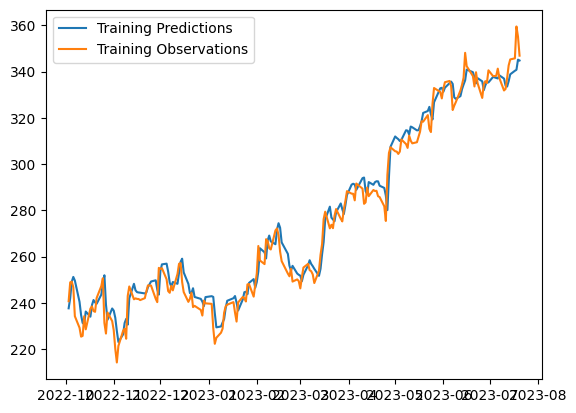

In [64]:
train_predictions = model.predict(X_train).flatten()

plt.plot(dates_train, train_predictions)
plt.plot(dates_train, y_train)
plt.legend(['Training Predictions', 'Training Observations'])

1/1 [==============================] - 0s 35ms/step


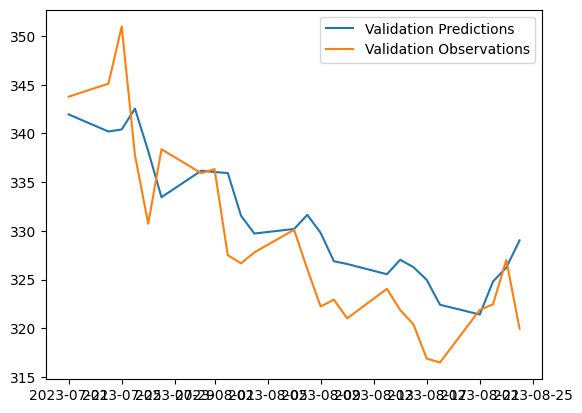

In [65]:
val_predictions = model.predict(X_val).flatten()

plt.plot(dates_val, val_predictions)
plt.plot(dates_val, y_val)
plt.legend(['Validation Predictions', 'Validation Observations'])

1/1 [==============================] - 0s 34ms/step


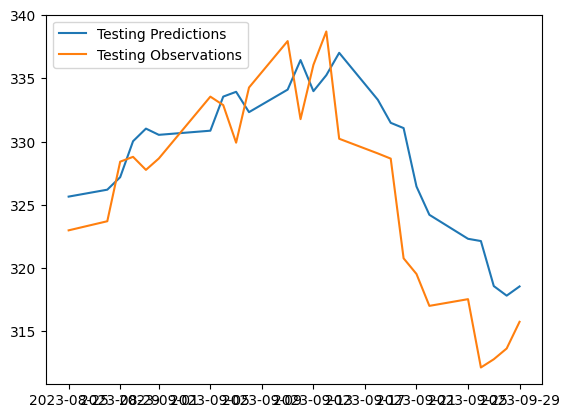

In [66]:
test_predictions = model.predict(X_test).flatten()

plt.plot(dates_test, test_predictions)
plt.plot(dates_test, y_test)
plt.legend(['Testing Predictions', 'Testing Observations'])

Plotting all the outcomes in a single graph 

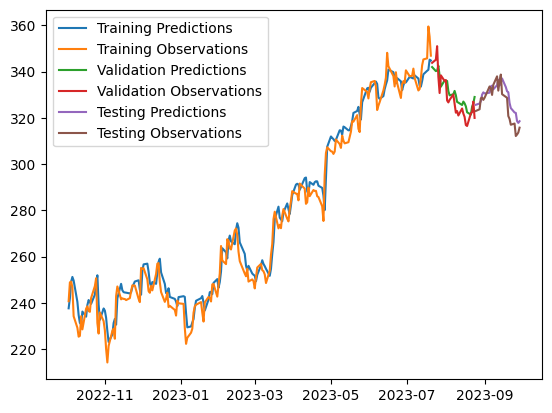

In [67]:
plt.plot(dates_train, train_predictions)
plt.plot(dates_train, y_train)
plt.plot(dates_val, val_predictions)
plt.plot(dates_val, y_val)
plt.plot(dates_test, test_predictions)
plt.plot(dates_test, y_test)
plt.legend(['Training Predictions', 
            'Training Observations',
            'Validation Predictions', 
            'Validation Observations',
            'Testing Predictions', 
            'Testing Observations'])

Also for a long term prediction we can iteratively train the ML Model using deepcopy method from copy model

In [68]:
from copy import deepcopy

recursive_predictions = []
recursive_dates = np.concatenate([dates_val, dates_test])

for target_date in recursive_dates:
  last_window = deepcopy(X_train[-1])
  next_prediction = model.predict(np.array([last_window])).flatten()
  recursive_predictions.append(next_prediction)
  last_window[-1] = next_prediction

1/1 [==============================] - 0s 26ms/step


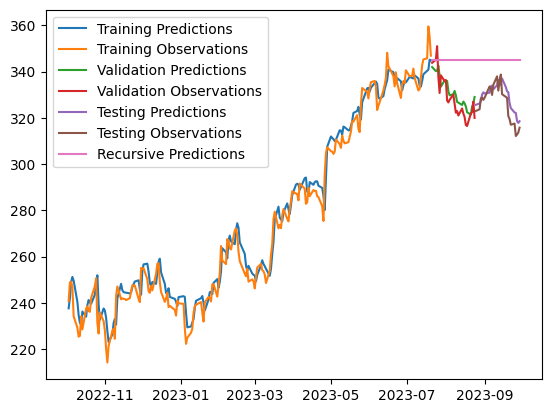

In [69]:
plt.plot(dates_train, train_predictions)
plt.plot(dates_train, y_train)
plt.plot(dates_val, val_predictions)
plt.plot(dates_val, y_val)
plt.plot(dates_test, test_predictions)
plt.plot(dates_test, y_test)
plt.plot(recursive_dates, recursive_predictions)
plt.legend(['Training Predictions', 
            'Training Observations',
            'Validation Predictions', 
            'Validation Observations',
            'Testing Predictions', 
            'Testing Observations',
            'Recursive Predictions'])